In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import pandas as pd
import matplotlib.animation as animation
from matplotlib.colors import Normalize
from matplotlib.animation import FuncAnimation
import matplotlib as mpl
from matplotlib import gridspec

In [46]:
plt.rcParams['font.family'] ='sans-serif'#使用するフォント
plt.rcParams['xtick.direction'] = 'in'#x軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')
plt.rcParams['ytick.direction'] = 'in'#y軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')
plt.rcParams['xtick.major.width'] = 1.0#x軸主目盛り線の線幅
plt.rcParams['ytick.major.width'] = 1.0#y軸主目盛り線の線幅
plt.rcParams['font.size'] = 14 #フォントの大きさ
plt.rcParams['axes.linewidth'] = 1.0# 軸の線幅edge linewidth。囲みの太さ

In [2]:
def eta_animation3D(X, Y, eta_list, frame_interval, filename):
    fig = plt.figure(figsize = (10, 8), facecolor = "white")
    ax = fig.add_subplot(111, projection='3d')

    surf = ax.plot_surface(X, Y, eta_list[0], cmap = plt.cm.RdBu_r)
    # surf = ax.contourf3D(X, Y, eta_list[0], cmap = plt.cm.RdBu_r)

    def update_surf(num):
        ax.clear()
        surf = ax.plot_surface(X, Y, eta_list[num], cmap = plt.cm.RdBu_r)
        # surf = ax.contourf3D(X, Y, eta_list[num], cmap = plt.cm.RdBu_r)
        ax.set_title("Surface elevation z(x,y,t) after $t={:.1f}$ hours".format(
            num*frame_interval/3600), fontname = "serif", fontsize = 19, y=1.04)
        ax.set_xlabel("x [km]", fontname = "serif", fontsize = 14)
        ax.set_ylabel("y [km]", fontname = "serif", fontsize = 14)
        ax.set_zlabel("z [m]", fontname = "serif", fontsize = 16)
        # ax.set_xlim(0, np.max(eta_list[num].shape))
        # ax.set_ylim(0, np.max(eta_list[num].shape))
        ax.set_xlim(X.min(), X.max())
        ax.set_ylim(Y.min(), Y.max())
        ax.set_zlim(-2.4, 4.8)
        # ax.set_zlim(eta_list[1].min(), eta_list[1].max())
        ax.set_box_aspect((2,1,1))
        plt.tight_layout()
        return surf,

    anim = animation.FuncAnimation(fig, update_surf,
        frames = len(eta_list), interval = 10, blit = False)
    mpeg_writer = animation.FFMpegWriter(fps = 24, bitrate = 10000,
        codec = "libx264", extra_args = ["-pix_fmt", "yuv420p"])
    anim.save("{}.mp4".format(filename), writer = mpeg_writer)
    return anim 

In [3]:
# def animation2D(X, Y, u, v, eta_list, frame_interval, filename):
def animation2D(X, Y, u, v, eta_list, frame_interval, filename):
    fig = plt.figure(figsize = (10, 5), facecolor = "white")
    spec = gridspec.GridSpec(ncols=2, nrows=1,width_ratios=[50, 1])
    # ax1 = fig.add_subplot(111)
    ax1 = fig.add_subplot(spec[0])
    ax2 = fig.add_subplot(spec[1])

    partial = lambda x: x[::10, ::10]
    
    surf = ax1.contourf(X, Y, eta_list[0], vmin=-0.4, vmax=0.4, cmap = plt.cm.coolwarm)
    x, y, U, V = list(map(partial, [X, Y, u[0], v[0]]))
    # vel = ax1.quiver(x,y,U,V)
    
    norm = mpl.colors.Normalize(vmin=-0.4, vmax=0.4)
    cbar = mpl.colorbar.ColorbarBase(
        ax=ax2,
        cmap=plt.cm.coolwarm,
        norm=norm,
        orientation="vertical",
    )
    

    def update(num):
        ax1.clear()
        surf = ax1.contourf(X, Y, eta_list[num], vmin=-0.4, vmax=0.4, cmap = plt.cm.coolwarm)
        x, y, U, V = list(map(partial, [X, Y, u[num], v[num]]))
        # vel = ax1.quiver(x,y,U,V)
        ax1.set_title("Velocity field u(x,y,t) after $t={:.1f}$ hours".format(
            num*frame_interval/3600), fontname = "serif", fontsize = 19, y=1.04)
        ax1.set_xlabel("x [km]", fontname = "serif", fontsize = 14)
        ax1.set_ylabel("y [km]", fontname = "serif", fontsize = 14)
        ax1.set_xlim(X.min(), X.max())
        ax1.set_ylim(Y.min(), Y.max())
        plt.tight_layout()
        return surf,


    anim = animation.FuncAnimation(fig, update,
        frames = len(eta_list), interval = 10, blit = False)
    mpeg_writer = animation.FFMpegWriter(fps = 24, bitrate = 10000,
        codec = "libx264", extra_args = ["-pix_fmt", "yuv420p"])
    anim.save("{}.mp4".format(filename), writer = mpeg_writer)
    return anim 

In [35]:
def animationX(x,y, eta_list, frame_interval, filename):
    fig = plt.figure(figsize = (10, 5), facecolor = "white")
    ax1 = fig.add_subplot(111)
    
    wave = ax1.plot(x, eta_list[0,y])


    def update(num):
        ax1.clear()
        wave = ax1.plot(x, eta_list[num,y])
        ax1.set_xlabel("x [km]", fontname = "serif", fontsize = 14)
        ax1.set_ylabel("z [m]", fontname = "serif", fontsize = 14)
        ax1.set_ylim(-1,1)
        plt.tight_layout()
        return wave,


    anim = animation.FuncAnimation(fig, update,
        frames = len(eta_list), interval = 10, blit = False)
    mpeg_writer = animation.FFMpegWriter(fps = 24, bitrate = 10000,
        codec = "libx264", extra_args = ["-pix_fmt", "yuv420p"])
    anim.save("{}.mp4".format(filename), writer = mpeg_writer)
    return anim 

In [40]:
nt = 126
# k=1
# l=7
n = int(512*2)
ny = int(256*1)
# z = np.loadtxt("./output/z{}.txt".format(k))
# z = z.reshape(nt,ny,n)

# z = np.loadtxt("../Anomary/output/z.txt")
# z = np.loadtxt("./output/out022702/z3.txt")
z = np.loadtxt("./output/z.txt")
z = z.reshape(nt,ny,n)
# u = np.loadtxt("./output/u.txt")
# v = np.loadtxt("./output/v.txt")
# u = u.reshape(nt,ny,n)
# v = v.reshape(nt,ny,n)

x = np.linspace(-15000,15000,n)
y = np.linspace(-15000,15000,ny)
# x,y = np.meshgrid(x, y)
# y, x = np.mgrid[:z[0].shape[0], :z[0].shape[1]]

In [20]:
256*1024*56

14680064

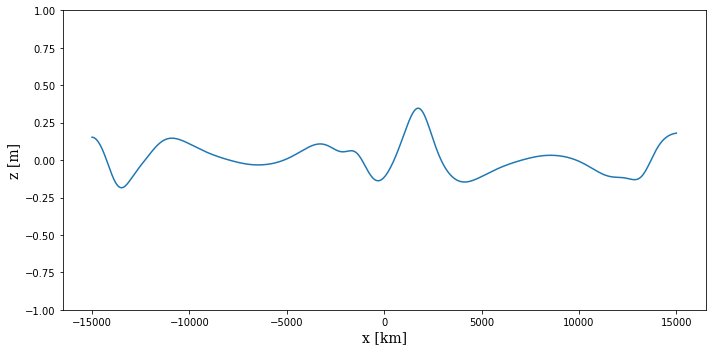

In [42]:
animationX(x, 128, z, 20, "./fig/equat8")

In [70]:
nt = 1200
n = int(128)
ny = int(64)
z = np.loadtxt("./output/z_dif_res2/z.txt")
z = z.reshape(nt,ny,n)
# x = np.linspace(-3000,3000,n)
# y = np.linspace(-1500,1500,ny)
y, x = np.mgrid[:z[0].shape[0], :z[0].shape[1]]

In [35]:
1500/6400*180/np.pi

13.42869832337867

In [25]:
nt = 200
n = int(512)
ny = int(256)
z = np.loadtxt("./output/z.txt")
z = z.reshape(nt,ny,n)
# z4 = np.loadtxt("./output/z4.txt")
# z4 = z.reshape(nt,int(ny/8),int(n/8))
x = np.linspace(-15000,15000,n)
y = np.linspace(-7500,7500,ny)
x,y = np.meshgrid(x, y)

KeyboardInterrupt: 

In [39]:
14024704/256/512

107.0

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (4096,) and arg 1 with shape (1024,).

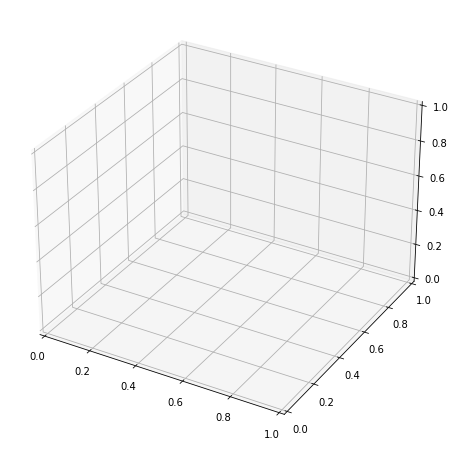

In [21]:
# animation2D(x,y,u,v,z,720,"./fig/anim")
eta_animation3D(x,y,z,36,"./fig/z4")
# animationX(x,z,720,"./fig/anim")

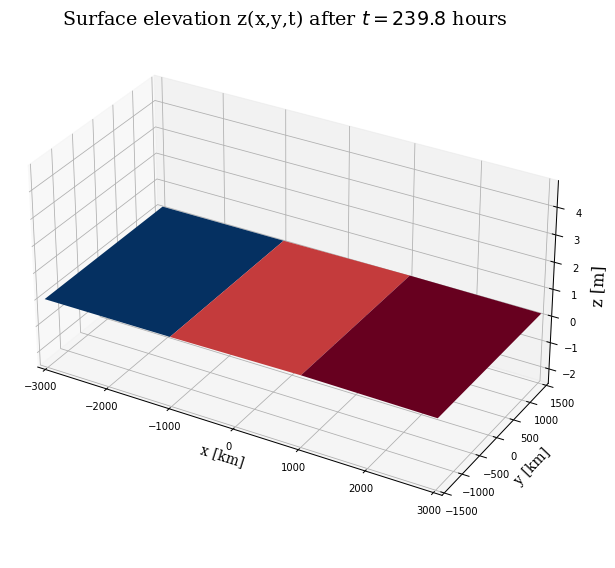

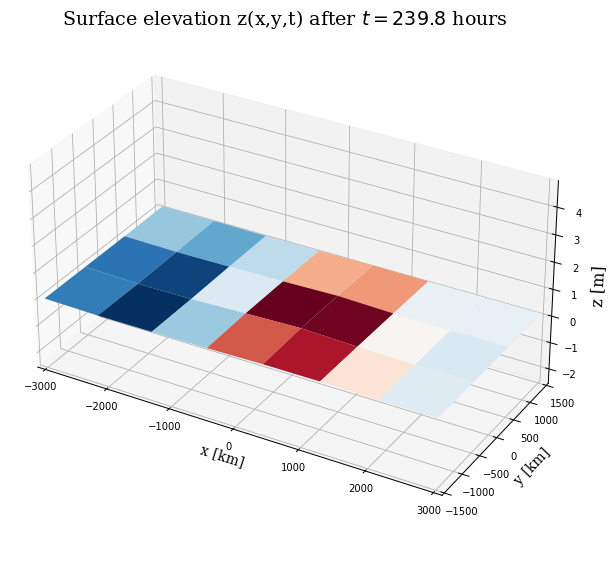

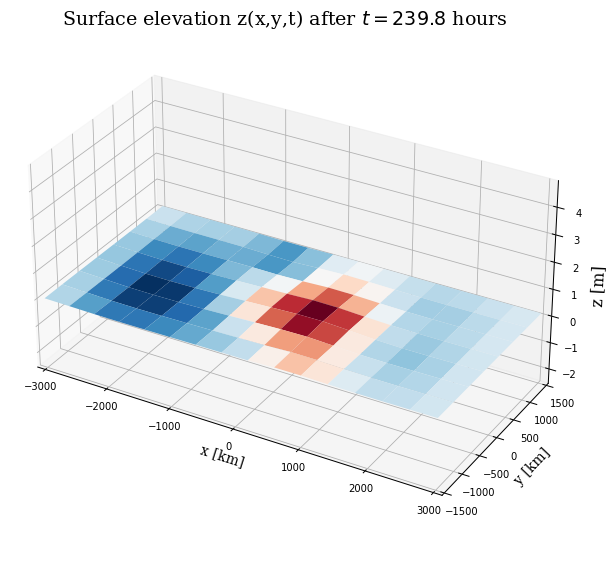

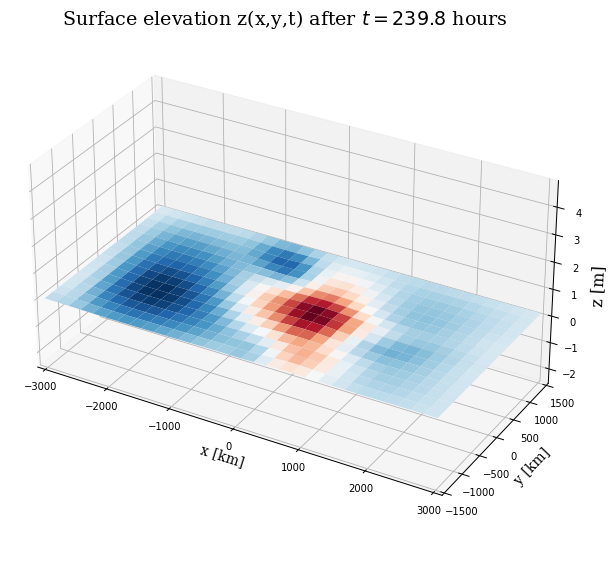

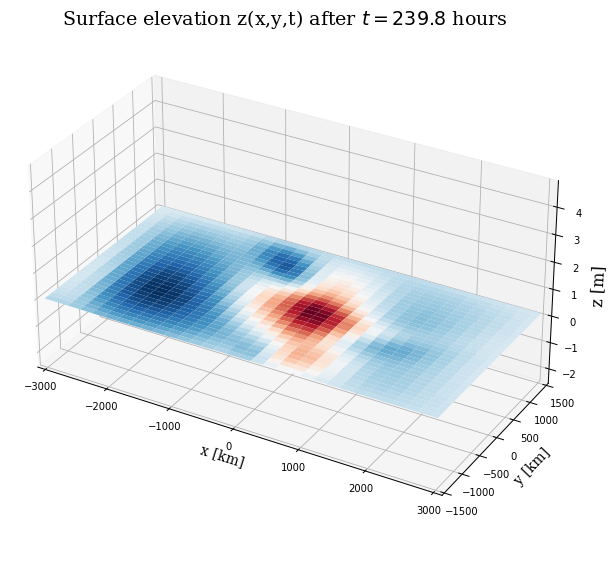

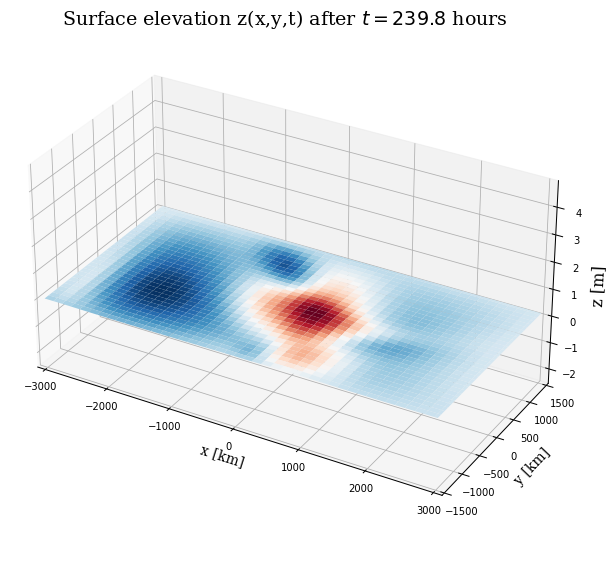

In [41]:
nt = 1200
for i in range(6):
  k = i+1
  l=7
  n = int(256/(2**(l-k)))
  ny = int(128/(2**(l-k)))
  z = np.loadtxt("./output/z_center_720_long/z{}.txt".format(k))
  z = z.reshape(nt,ny,n)

  x = np.linspace(-3000,3000,n)
  y = np.linspace(-1500,1500,ny)
  x,y = np.meshgrid(x, y)
  
  eta_animation3D(x,y,z,720,"./fig/z_center_720_long/anim_z{}".format(k))

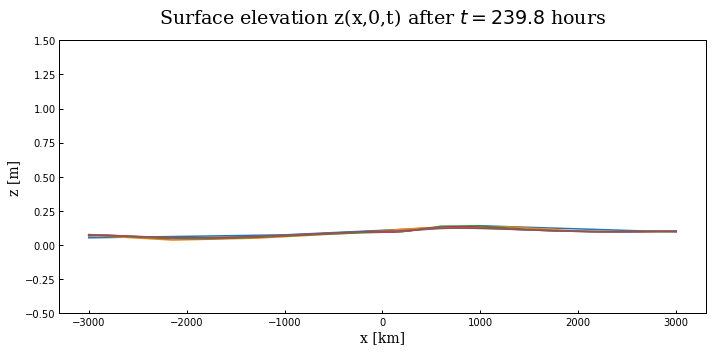

In [43]:
filename = "./fig/anim"
nt = 1200
frame_interval = 720
fig = plt.figure(figsize = (10, 5), facecolor = "white")
ax1 = fig.add_subplot(111)
x = []
z0 = []
imax = 6
for i in range(imax):
  k = i+1
  l=7
  n = int(256/(2**(l-k)))
  ny = int(128/(2**(l-k)))
  z = np.loadtxt("./output/z_center_240_long/z{}.txt".format(k))
  z = z.reshape(nt,ny,n)
  z0.append(z.tolist())

  x.append(list(np.linspace(-3000,3000,n)))
  y = np.linspace(-1500,1500,ny)

for i in range(imax):
  wave = ax1.plot(x[i], z0[i][0][0])

def update(num):
  ax1.clear()
  for i in range(imax):
    wave = ax1.plot(x[i], z0[i][num][0])
  ax1.set_title("Surface elevation z(x,0,t) after $t={:.1f}$ hours".format(
            num*frame_interval/3600), fontname = "serif", fontsize = 19, y=1.04)
  ax1.set_xlabel("x [km]", fontname = "serif", fontsize = 14)
  ax1.set_ylabel("z [m]", fontname = "serif", fontsize = 14)
  ax1.set_ylim(-0.5,1.5)
  plt.tight_layout()
  return wave,


anim = animation.FuncAnimation(fig, update,
    frames = len(z), interval = 10, blit = False)
mpeg_writer = animation.FFMpegWriter(fps = 24, bitrate = 10000,
    codec = "libx264", extra_args = ["-pix_fmt", "yuv420p"])
anim.save("{}.mp4".format(filename), writer = mpeg_writer)

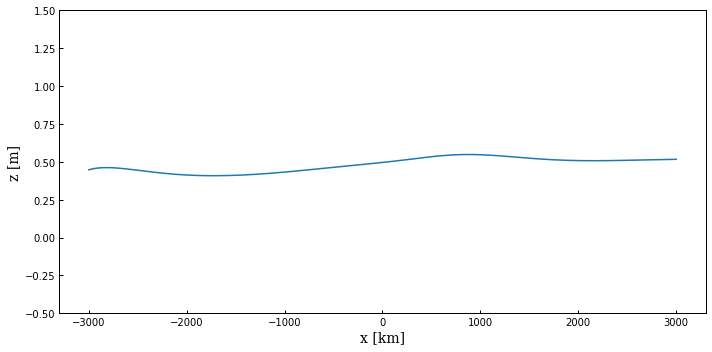

In [68]:
filename = "./fig/anim"
nt = 1200
k = 6
l = 9
n = int(1024/(2**(l-k)))
ny = int(512/(2**(l-k)))
fig = plt.figure(figsize = (10, 5), facecolor = "white")
ax1 = fig.add_subplot(111)
z0 = np.loadtxt("./output/z_dif_res2/z{}.txt".format(k))
z0 = z0.reshape(nt,ny,n)
z1 = np.loadtxt("./output/z_dif_res2/z.txt")
z1 = z1.reshape(nt,ny,n)
x = np.linspace(-3000,3000,n)
for i in range(2):
  wave = ax1.plot(x, z0[0][0])

def update(num):
  ax1.clear()
  for i in range(2):
    exec("wave = ax1.plot(x, z{}[num][0])".format(i))
  ax1.set_xlabel("x [km]", fontname = "serif", fontsize = 14)
  ax1.set_ylabel("z [m]", fontname = "serif", fontsize = 14)
  ax1.set_ylim(-0.5,1.5)
  plt.tight_layout()
  return wave,


anim = animation.FuncAnimation(fig, update,
    frames = len(z), interval = 10, blit = False)
mpeg_writer = animation.FFMpegWriter(fps = 24, bitrate = 10000,
    codec = "libx264", extra_args = ["-pix_fmt", "yuv420p"])
anim.save("{}.mp4".format(filename), writer = mpeg_writer)

In [ ]:
resno=np.loadtxt("./output/resno.txt")
res1 = np.loadtxt("./output/res1.txt")
res2 = np.loadtxt("./output/res2.txt")
res3 = np.loadtxt("./output/res3.txt")
res4 = np.loadtxt("./output/res4.txt")
fig,ax = plt.subplots(figsize=(10,8))
ax.set_yscale('log')
ax.plot(resno,'o-',label="ngrid=1")
ax.plot(res1,'o-',label="ngrid=2")
ax.plot(res2,'o-',label="ngrid=3")
ax.plot(res3,'o-',label="ngrid=4")
ax.plot(res4,'o-',label="ngrid=5")
ax.legend(loc='lower left')
ax.set_xlim(0,50)
ax.set_xlabel("Iterations")
ax.set_ylabel("Residuals")
# plt.savefig("./fig/res_history.png")
plt.show()

In [ ]:
# nt = 1000
# n = 160
# ny = 80
# # fig,ax = plt.subplots()
fig = plt.figure(figsize = (16, 8))
ax = fig.add_subplot(111,projection='3d')
ax.set_position([0.1,0.1,0.8,0.8])
ims = []
# z = np.loadtxt("./output/z.txt")
# z = z.reshape(nt,ny,n)
# x = np.linspace(-3000,3000,n)
# y = np.linspace(-1500,1500,ny)
# x,y = np.meshgrid(x, y)
for i in range(2):
    # im = ax.imshow(z[i],vmin=-4.8,vmax=4.8)
    ax.set_zlim(-2.4,4.8)
    ax.set_box_aspect((2,1,1))
    ax.set_xlabel('x [km]')
    ax.set_ylabel('y [km]')
    ax.set_zlabel('z [m]')
    ax.set_title("Surface elevation z(x,y,t) after t = {nt} hours".format(nt=i*0.2))
    im = ax.plot_surface(x,y,z[i], cmap = "summer")
    ims.append([im])
    
im
ani = animation.ArtistAnimation(fig,ims,interval=50)
ani.save('./fig/anim.gif')
plt.show()

In [ ]:
# nt = 100
# n = 160
# ny = 80
# # n = 48
# # ny = 24
# u = np.loadtxt("./output/u.txt")
# v = np.loadtxt("./output/v.txt")
# z = np.loadtxt("./output/z.txt")
# # um = np.loadtxt("./output/um.txt")
# # vm = np.loadtxt("./output/vm.txt")
# # zm = np.loadtxt("./output/zm.txt")

# u = u.reshape(nt,ny,n)
# v = v.reshape(nt,ny,n)
# z = z.reshape(nt,ny,n)
# # um = um.reshape(nt,ny,n)
# # vm = vm.reshape(nt,ny,n)
# # zm = zm.reshape(nt,ny,n)
# print(z.max())
# x = np.linspace(0,6000,n)
# y = np.linspace(0,3000,ny)
# x,y = np.meshgrid(x, y)
# # x, y = np.mgrid[0:n, 0:ny]
# partial = lambda x: x[::5, ::5]
# # partial = lambda x: x[::1, ::1]

for i in range(10):
    fig = plt.figure(figsize=(20,5))
    ax1 = fig.add_subplot(1,2,1)
#   ax2 = fig.add_subplot(1,2,2)
    X, Y, U, V = list(map(partial, [x, y, u[i], v[i]]))
	# Z = map(partial, z[i])
    print('cycle = ', (i+1))
    cntr1 = ax1.contourf(x,y,z[i],vmin=-2.4,vmax=10.8)
#   ax2.contourf(x,y,zm[i])
    ax1.quiver(X,Y,U,V)
#   ax2.quiver(X,Y,UM,VM)
    fig.colorbar(cntr1, ax=ax1)
    plt.show()

In [ ]:
nt = 100
nx = 48
ny = 24
nx1 = int(nx/4)
ny1 = int(ny/4)
nx2 = int(nx/2)
ny2 = int(ny/2)
nx3 = int(nx)
ny3 = int(ny)
# u = np.loadtxt("./output/u1.txt")
# v = np.loadtxt("./output/v1.txt")
z = np.loadtxt("./output/z7.txt")
# z1 = np.loadtxt("./output/z1.txt")
# z2 = np.loadtxt("./output/z2.txt")
# z3 = np.loadtxt("./output/z3.txt")
# z4 = np.loadtxt("./output/z4.txt")
# z5 = np.loadtxt("./output/z5.txt")
# z6 = np.loadtxt("./output/z6.txt")

# u = u.reshape(nt,ny,n)
# v = v.reshape(nt,ny,n)
z = z.reshape(nt,ny1,nx1)
# z1 = z1.reshape(nt,ny1,nx1)
# z2 = z2.reshape(nt,ny2,nx2)
# z3 = z3.reshape(nt,ny3,nx3)
# z4 = z4.reshape(nt,ny1,nx1)
# z5 = z5.reshape(nt,ny2,nx2)
# z6 = z6.reshape(nt,ny3,nx3)
for i in range(nt):
# for i in range(10):
    fig = plt.figure(figsize=(20,5))
    ax = fig.add_subplot(1,3,1)
#     ax1 = fig.add_subplot(1,3,1)
#     ax2 = fig.add_subplot(1,3,2)
#     ax3 = fig.add_subplot(1,3,3)
    cs = ax.contour(z[i,:,:])
#     cs1 = ax1.contour(z1[i,:,:])
#     cs2 = ax2.contour(z2[i,:,:])
#     cs3 = ax3.contour(z5[i,:,:])
    ax.clabel(cs)
#     ax1.clabel(cs1)
#     ax2.clabel(cs2)
#     ax3.clabel(cs3)
    # plt.pcolormesh(z[i])
    print('cycle = ', (i+1))
    # plt.xlim(0,5)
    # plt.ylim(9,15)
#     plt.colorbar()
    plt.show()

In [ ]:
resno=np.loadtxt("./output/resno.txt")
res0 = np.loadtxt("./output/res0.txt")
res1 = np.loadtxt("./output/res1.txt")
res2 = np.loadtxt("./output/res2.txt")
res3 = np.loadtxt("./output/res3.txt")
plt.yscale('log')
plt.plot(resno,'o-',label="ngrid=1")
plt.plot(res0,'o-',label="ngrid=2")
plt.plot(res1,'o-',label="ngrid=3")
plt.plot(res2,'o-',label="ngrid=4")
plt.plot(res3,'o-',label="ngrid=5")
plt.legend()
plt.xlim(0,50)